In [82]:
import pandas as pd
from sqlalchemy import create_engine

host = 'xxxxxxxxxx'
port = '5432'
username = 'xxxxxxxxxx'
password = 'xxxxxxxxxx'
database = 'xxxxxxxxxx'

connection_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_url)

query = 'SELECT * FROM "crypto"'
df = pd.read_sql(query, engine)

In [83]:
df

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611
...,...,...,...,...,...,...,...,...,...,...
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0,0.000000,0.000000


In [84]:
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

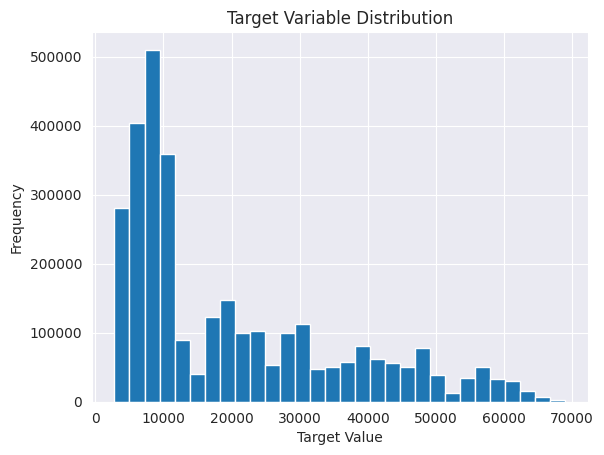

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Побудова гістограми для цільової змінної
plt.hist(df['close'], bins=30)
plt.title('Target Variable Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

In [86]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.set_index('timestamp', inplace=True)

df = df.resample('1h').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'quote_asset_volume': 'sum',
    'number_of_trades': 'sum',
    'taker_buy_base_asset_volume': 'sum',
    'taker_buy_quote_asset_volume': 'sum'
})

df.reset_index(inplace=True)
df

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,2.023661e+05,171,35.160503,1.509525e+05
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,1.003048e+05,102,21.448071,9.260828e+04
2,2017-08-17 06:00:00,4315.32,4345.45,4309.37,4324.35,7.229691,3.128231e+04,36,4.802861,2.079532e+04
3,2017-08-17 07:00:00,4324.35,4349.99,4287.41,4349.99,4.443249,1.924106e+04,25,2.602292,1.129135e+04
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4.239504e+03,28,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...,...
52205,2023-08-01 09:00:00,28994.91,28995.59,28926.82,28928.37,701.689970,2.031670e+07,18388,272.621590,7.893029e+06
52206,2023-08-01 10:00:00,28928.36,28946.00,28900.00,28928.01,1026.037790,2.967131e+07,20151,319.024080,9.226202e+06
52207,2023-08-01 11:00:00,28928.02,28930.57,28862.18,28862.19,891.022530,2.574221e+07,22005,354.411540,1.023926e+07
52208,2023-08-01 12:00:00,28862.19,28927.50,28753.74,28878.57,1913.253970,5.523307e+07,41270,981.181410,2.833167e+07


In [87]:
df.isnull().sum()

timestamp                         0
open                            128
high                            128
low                             128
close                           128
volume                            0
quote_asset_volume                0
number_of_trades                  0
taker_buy_base_asset_volume       0
taker_buy_quote_asset_volume      0
dtype: int64

In [88]:
df.fillna(method='ffill', inplace=True)

df.isnull().sum()

/tmp/ipykernel_4647/3264261867.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

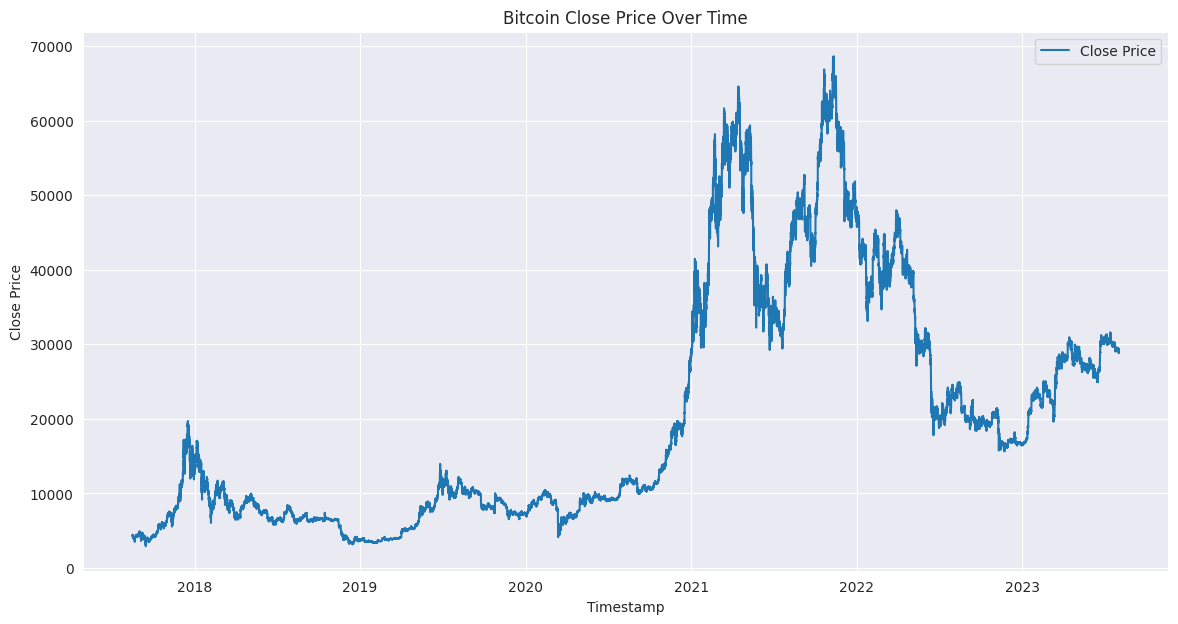

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.legend()
plt.show()

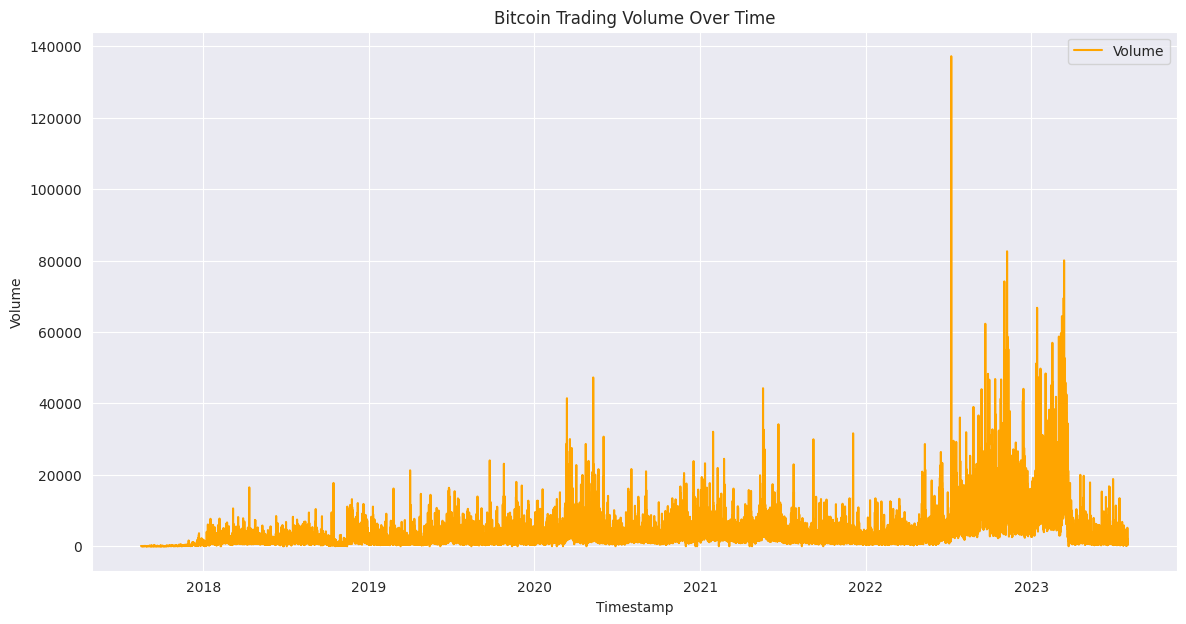

In [90]:
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['volume'], label='Volume', color='orange')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.show()

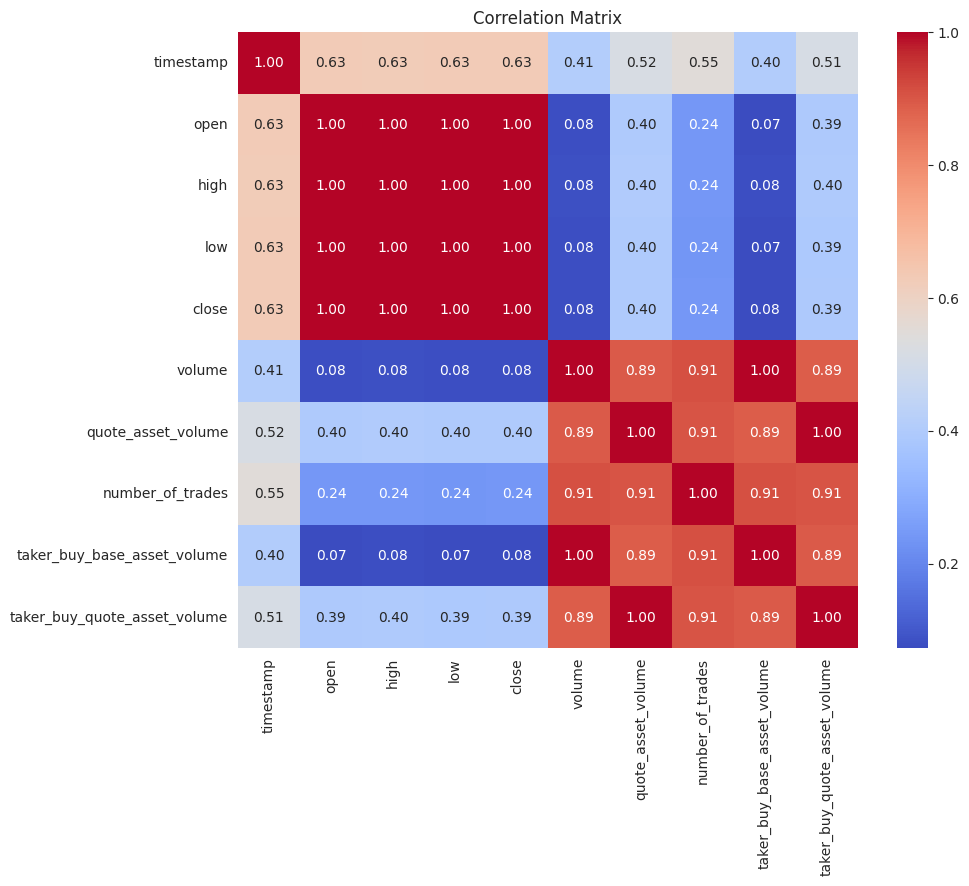

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

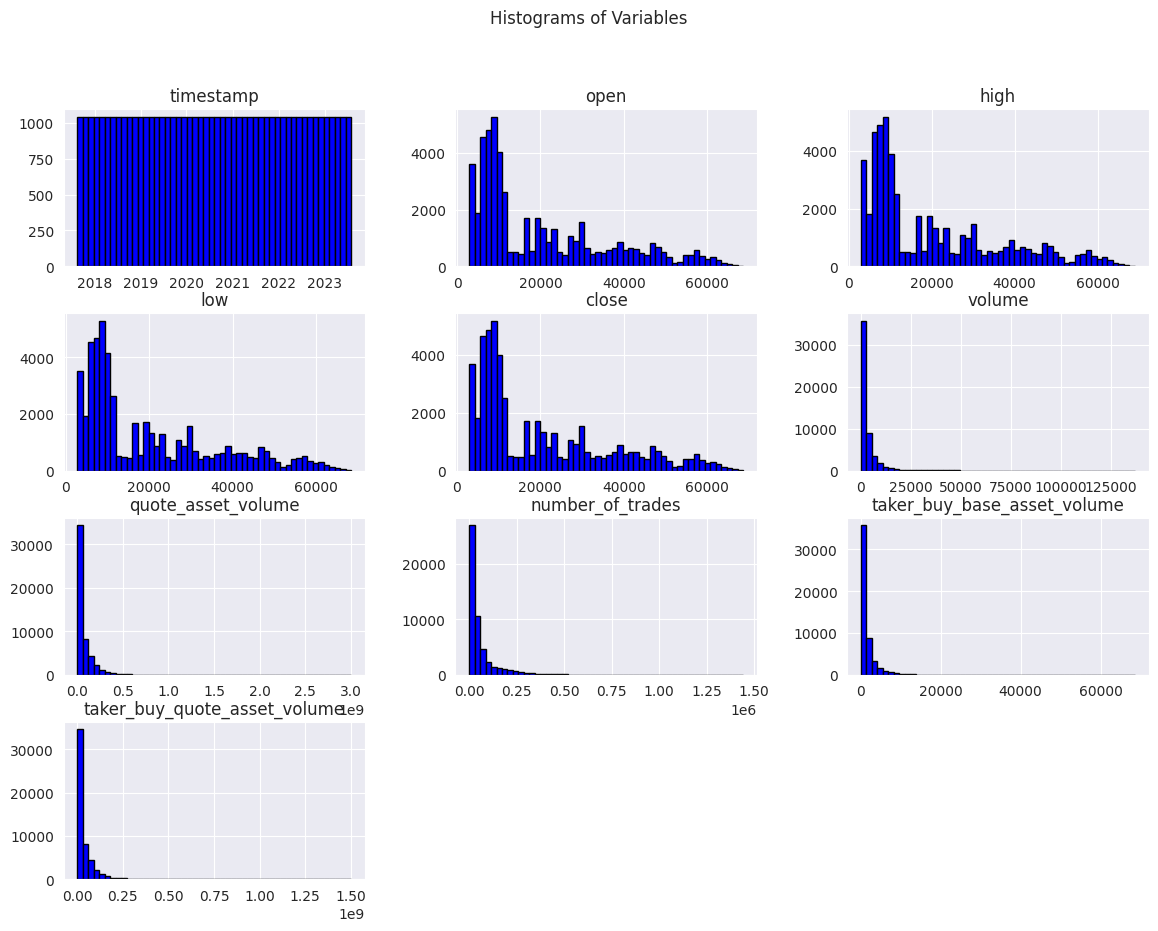

In [92]:
df.hist(figsize=(14, 10), bins=50, color='blue', edgecolor='black')
plt.suptitle('Histograms of Variables')
plt.show()

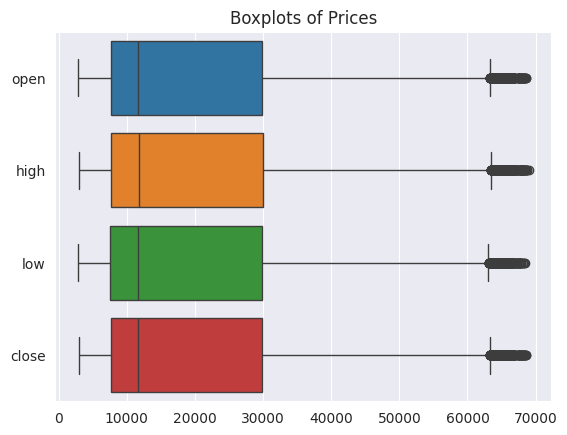

In [93]:
sns.boxplot(data=df[['open', 'high', 'low', 'close']], orient='h')
plt.title('Boxplots of Prices')
plt.show()

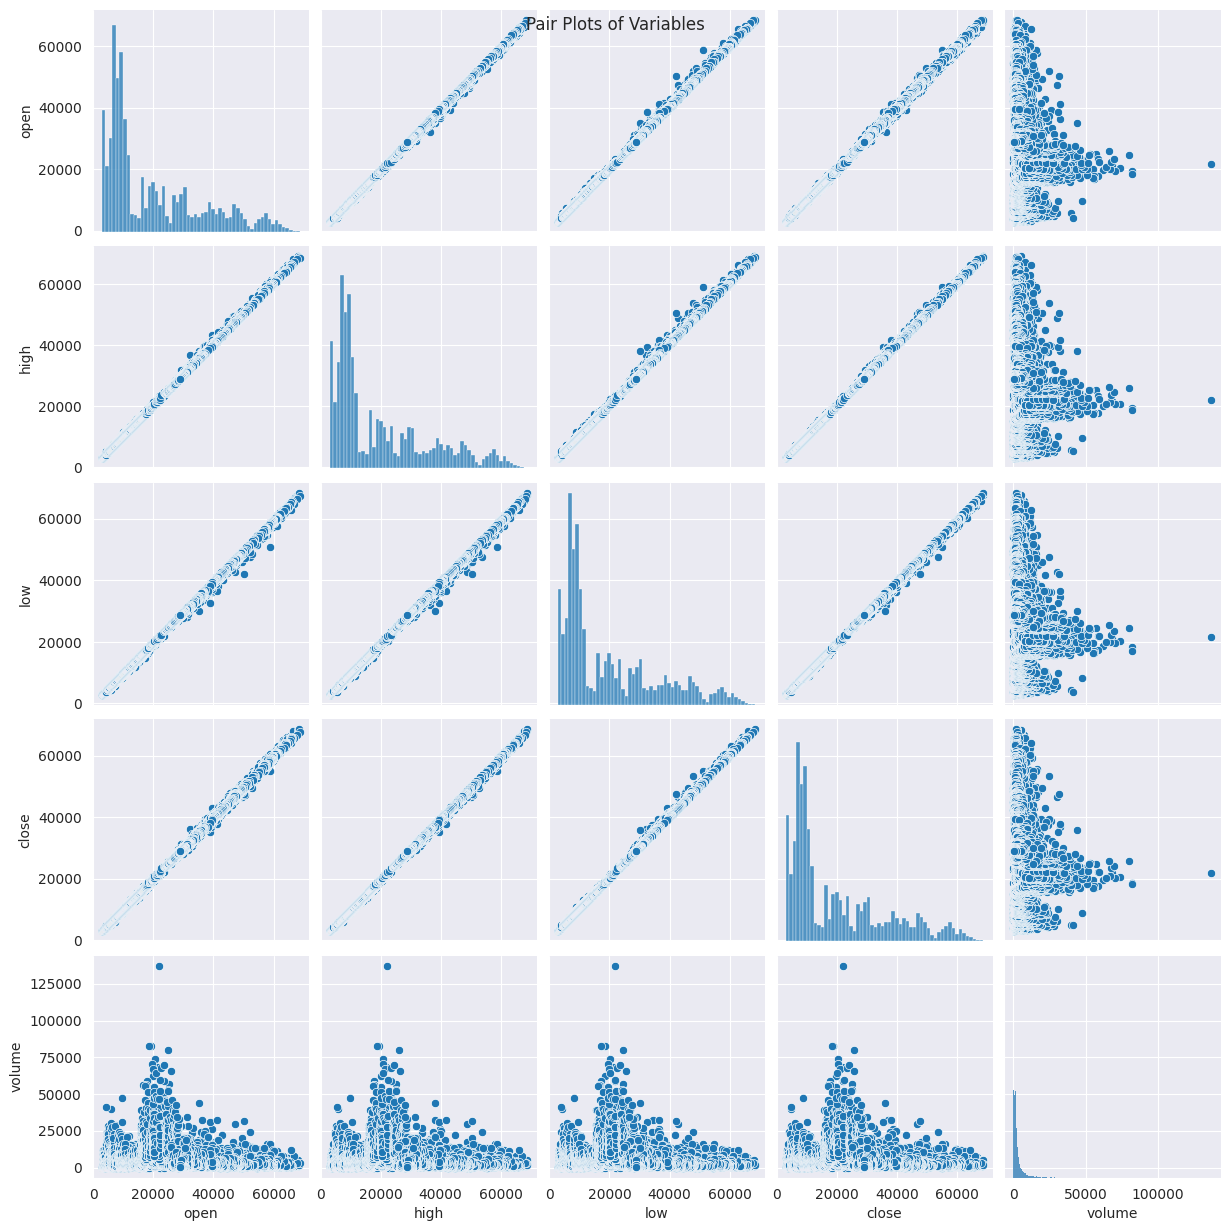

In [94]:
sns.pairplot(df[['open', 'high', 'low', 'close', 'volume']])
plt.suptitle('Pair Plots of Variables')
plt.show()

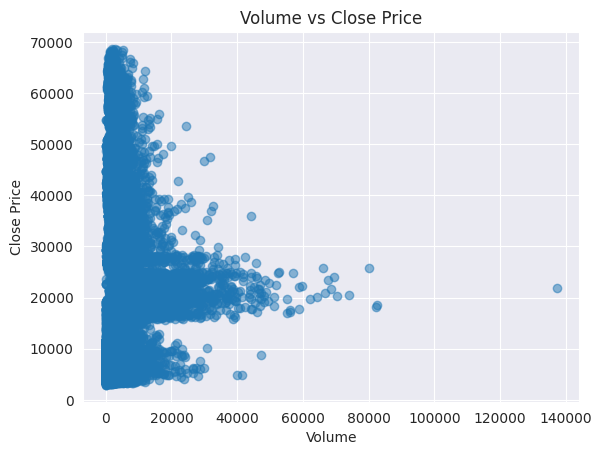

In [95]:
plt.scatter(df['volume'], df['close'], alpha=0.5)
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

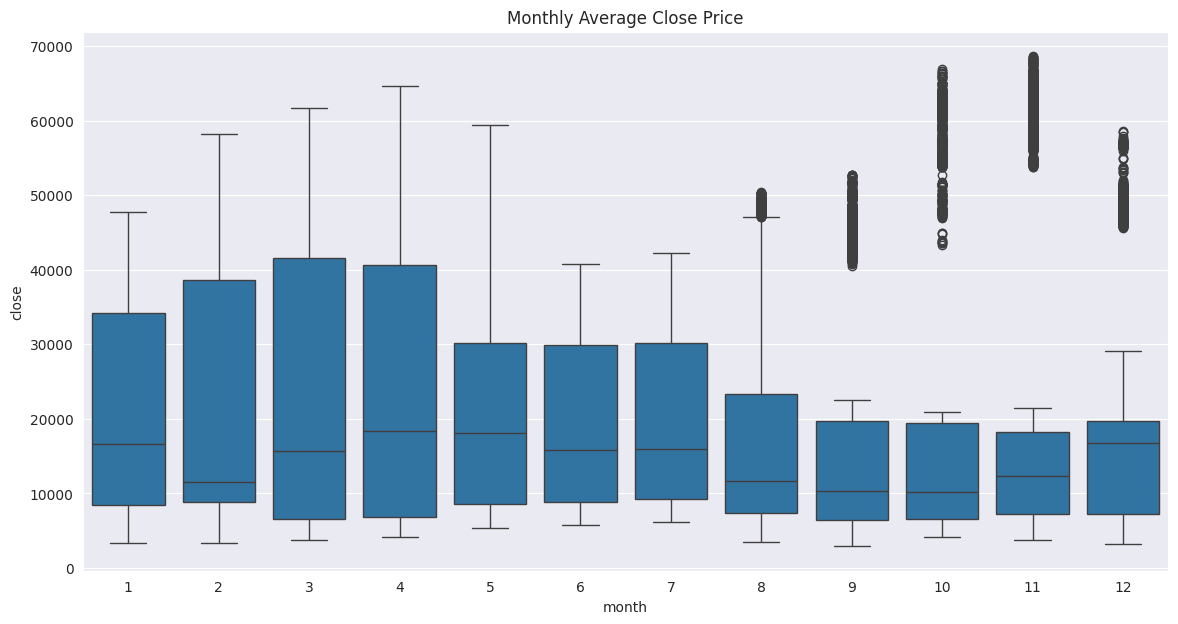

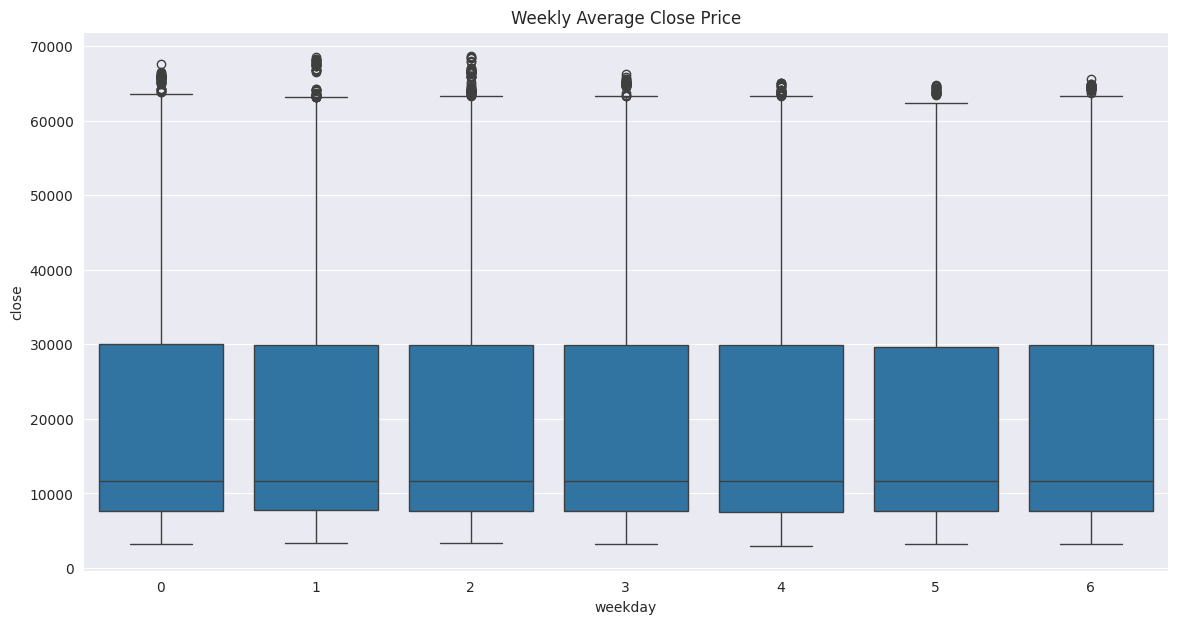

In [96]:
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday

plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='close', data=df)
plt.title('Monthly Average Close Price')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='weekday', y='close', data=df)
plt.title('Weekly Average Close Price')
plt.show()

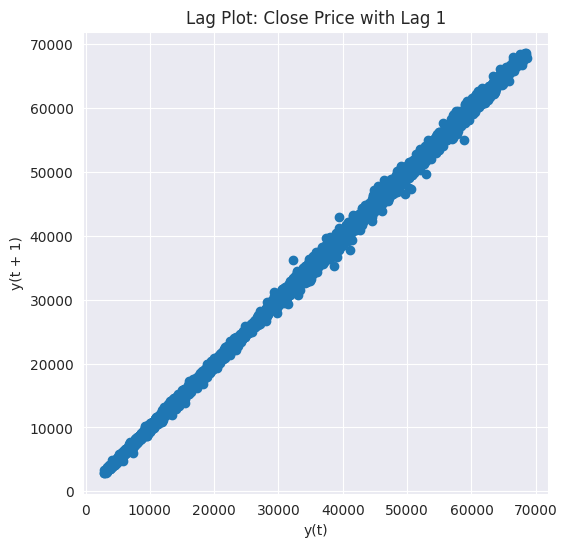

In [97]:
from pandas.plotting import lag_plot

plt.figure(figsize=(6, 6))
lag_plot(df['close'], lag=1)
plt.title('Lag Plot: Close Price with Lag 1')
plt.show()

In [98]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday
df['hour'] = df['timestamp'].dt.hour

df.drop('timestamp', axis=1, inplace=True)

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,month,weekday,year,day,hour
0,0.021145,0.020645,0.022006,0.021149,0.000344,0.000067,0.000119,0.000512,0.000100,0.636364,0.500000,0.0,0.533333,0.173913
1,0.021865,0.020873,0.022463,0.021248,0.000169,0.000033,0.000071,0.000313,0.000062,0.636364,0.500000,0.0,0.533333,0.217391
2,0.021964,0.021127,0.022738,0.021386,0.000053,0.000010,0.000025,0.000070,0.000014,0.636364,0.500000,0.0,0.533333,0.260870
3,0.022101,0.021196,0.022403,0.021776,0.000032,0.000006,0.000017,0.000038,0.000008,0.636364,0.500000,0.0,0.533333,0.304348
4,0.022237,0.021618,0.023103,0.021939,0.000007,0.000001,0.000019,0.000012,0.000002,0.636364,0.500000,0.0,0.533333,0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52205,0.397237,0.394331,0.397808,0.395792,0.005114,0.006760,0.012751,0.003973,0.005252,0.636364,0.166667,1.0,0.000000,0.391304
52206,0.396225,0.393581,0.397400,0.395787,0.007478,0.009872,0.013973,0.004650,0.006139,0.636364,0.166667,1.0,0.000000,0.434783
52207,0.396220,0.393347,0.396823,0.394785,0.006494,0.008565,0.015259,0.005165,0.006813,0.636364,0.166667,1.0,0.000000,0.478261
52208,0.395219,0.393301,0.395171,0.395035,0.013944,0.018377,0.028618,0.014301,0.018850,0.636364,0.166667,1.0,0.000000,0.521739


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52210 entries, 0 to 52209
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          52210 non-null  float64
 1   high                          52210 non-null  float64
 2   low                           52210 non-null  float64
 3   close                         52210 non-null  float64
 4   volume                        52210 non-null  float64
 5   quote_asset_volume            52210 non-null  float64
 6   number_of_trades              52210 non-null  float64
 7   taker_buy_base_asset_volume   52210 non-null  float64
 8   taker_buy_quote_asset_volume  52210 non-null  float64
 9   month                         52210 non-null  float64
 10  weekday                       52210 non-null  float64
 11  year                          52210 non-null  float64
 12  day                           52210 non-null  float64
 13  h

In [100]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = df[['close', 'open', 'high', 'low', 'volume', 'quote_asset_volume',
           'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
           'month', 'weekday', 'year', 'day', 'hour']].values

def create_dataset(dataframe, time_sp=60):
    X1, y1 = [], []
    for i in range(len(dataframe) - time_sp - 1):
        X1.append(dataframe[i:(i + time_sp), :])
        y1.append(dataframe[i + time_sp, 0]) 
    return np.array(X1), np.array(y1)

time_step = 60  

X, y = create_dataset(data, time_step)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = np.concatenate((train_predict, X_train[:, -1, 1:]), axis=1)[:, 0]
test_predict = np.concatenate((test_predict, X_test[:, -1, 1:]), axis=1)[:, 0]

mse_train = mean_squared_error(y_train, train_predict)
mae_train = mean_absolute_error(y_train, train_predict)
r2_train = r2_score(y_train, train_predict)

print(f'Training MSE: {mse_train}')
print(f'Training MAE: {mae_train}')
print(f'Training R^2 Score: {r2_train}')

mse_test = mean_squared_error(y_test, test_predict)
mae_test = mean_absolute_error(y_test, test_predict)
r2_test = r2_score(y_test, test_predict)

print(f'Test MSE: {mse_test}')
print(f'Test MAE: {mae_test}')
print(f'Test R^2 Score: {r2_test}')

Epoch 1/10


/home/yan/PycharmProjects/youtube_video_popularity_prediction/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1304/1304 ━━━━━━━━━━━━━━━━━━━━ 54s 40ms/step - loss: 0.0037 - val_loss: 1.0954e-04
Epoch 2/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - loss: 7.4191e-04 - val_loss: 3.1611e-04
Epoch 3/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - loss: 6.6617e-04 - val_loss: 1.4539e-04
Epoch 4/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - loss: 5.5618e-04 - val_loss: 1.2224e-04
Epoch 5/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - loss: 5.3035e-04 - val_loss: 2.6522e-04
Epoch 6/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - loss: 5.0021e-04 - val_loss: 1.3291e-04
Epoch 7/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - loss: 4.9092e-04 - val_loss: 8.7444e-05
Epoch 8/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - loss: 4.8920e-04 - val_loss: 6.9492e-05
Epoch 9/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - loss: 4.9410e-04 - val_loss: 6.3079e-05
Epoch 10/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - loss: 4.6919e-04 - val_loss: 3.3980e-04
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 25s

In [106]:
import keras

keras.saving.save_model(model, 'my_model.keras')